# importing dependencies

In [23]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# loading the data 

In [2]:
customers= pd.read_csv('C:/Users/ASUS/Desktop/datasets/customer.csv',encoding='ISO_8859-1' ,delimiter=';')
products= pd.read_csv('C:/Users/ASUS/Desktop/datasets/products.csv',encoding='ISO_8859-1' ,delimiter=';')
sales= pd.read_csv('C:/Users/ASUS/Desktop/datasets/sales.csv',encoding='ISO_8859-1' ,delimiter=';')

# Customers dataset

In [3]:
customers.head()

,id,country,gender,age,profession
0,CT-0001,France,Female,42,graduation
1,CT-0002,Tunisia,Female,41,basic
2,CT-0003,Tunisia,Female,42,basic
3,CT-0004,Egypt,Female,39,graduation
4,CT-0005,Algeria,Female,43,undergraduation


In [5]:
customers.shape

(1000, 5)

#### ====> The table of customers have 1000 rows and 6 columns.

## Mean | Max | Min

In [4]:
customers.describe()

,age
count,1000.00000
mean,39.12600
std,10.29933
min,18.00000
25%,32.00000
50%,37.00000
75%,44.00000
max,82.00000


### informations on features

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   country     1000 non-null   object
 2   gender      1000 non-null   object
 3   age         1000 non-null   int64 
 4   profession  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


## Data Cleaning

### Missing values

In [7]:
customers = customers.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(customers))

The total number of data-points after removing the rows with missing values are: 1000


In [8]:
products.isnull().sum()

id          0
name        0
category    0
price       0
dtype: int64

##### From the above output, we can conclude and note that:
    - there is not missing values
    - There are some categorical features in our data frame; as there are some features in dtype: object). 
      So we will need toencode them into numeric forms later(customerID,country,gender,profession).

### Encoding categorical values 

In [9]:
numeric_features=customers.select_dtypes(include=['int64','float64']).columns
categorical_features=customers.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()
for i in categorical_features :
    customers[i]=scale.fit_transform(customers[i])
customers.head()

,id,country,gender,age,profession
0,0,2,0,42,2
1,1,5,0,41,1
2,2,5,0,42,1
3,3,1,0,39,2
4,4,0,0,43,3


In [19]:
corr=customers.corr()
corr

,id,country,gender,age,profession
id,1.000000,-0.060313,-0.017799,0.076510,-0.015679
country,-0.060313,1.000000,-0.012666,-0.037300,0.029112
gender,-0.017799,-0.012666,1.000000,-0.064090,0.099740
age,0.076510,-0.037300,-0.064090,1.000000,-0.014245
profession,-0.015679,0.029112,0.099740,-0.014245,1.000000


# Products dataset 

## Data Cleaning

In [10]:
products.head()

,id,name,category,price
0,PT-0001,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,High-Tech,700
1,PT-0002,Motorola I265 phone,High-Tech,650
2,PT-0003,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,High-Tech,890
3,PT-0004,Motorola i335 Cell Phone Boost Mobile,High-Tech,900
4,PT-0005,Motorola V365 no contract cellular phone AT&T,High-Tech,400


In [12]:
products.shape

(794, 4)

#### ====> The table of products have 794 rows and 4 columns.

## Min | Max | Mean

In [11]:
products.describe()

,price
count,794.000000
mean,513.532746
std,280.395833
min,75.000000
25%,210.000000
50%,600.000000
75%,740.000000
max,900.000000


### informations on features

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        794 non-null    object
 1   name      794 non-null    object
 2   category  794 non-null    object
 3   price     794 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 24.9+ KB


## Data Cleaning

### Missing values


In [24]:
products = products.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(products))

The total number of data-points after removing the rows with missing values are: 794


In [15]:
products.isnull().sum()

id          0
name        0
category    0
price       0
dtype: int64

##### From the above output, we can conclude and note that:
    - there is not missing values
    - There are some categorical features in our data frame; as there are some features in dtype: object). 
      So we will need toencode them into numeric forms later(id,name,category).

### Encoding categorical values 


In [16]:
numeric_features1=products.select_dtypes(include=['int64','float64']).columns
categorical_features1=products.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()
for i in categorical_features1 :
    products[i]=scale.fit_transform(products[i])
products.head()

,id,name,category,price
0,0,116,0,700
1,1,287,0,650
2,2,247,0,890
3,3,321,0,900
4,4,313,0,400


## Correlation Matrix | Feature selection
The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1. Complete correlation between two variables is expressed by either + 1 or -1.

In [20]:
corr=products.corr()
corr

,id,name,category,price
id,1.000000,-0.103168,0.696130,-0.758245
name,-0.103168,1.000000,-0.121287,0.096959
category,0.696130,-0.121287,1.000000,-0.793146
price,-0.758245,0.096959,-0.793146,1.000000


#### Display correlation matrix in heatmap

<AxesSubplot:>

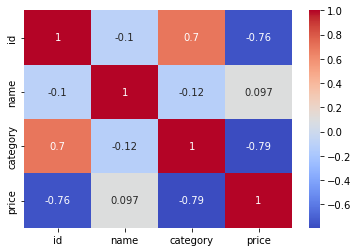

In [26]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### From the above output, we can conclude and note that:
    - When one variable increases as the other increases the 
    correlation is positive.
    -  Complete correlation between two variables is expressed by either + 1 or -1.
    -when one decreases as the other increases it is negative. 
    - Complete absence of correlation is represented by 0. 

## Histogram

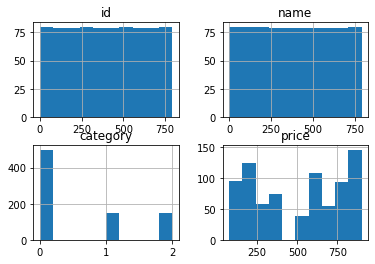

In [32]:
products.hist()
plt.show()

## Density Plot

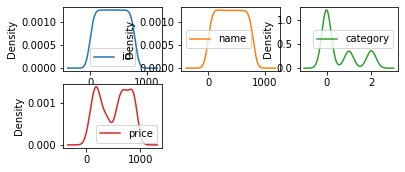

In [33]:
products.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

#  Sales dataset

## Data Cleaning

In [18]:
sales.head()

,customerID,productID,amount,Sdate
0,CT-0001,PT-0565,350.0,25/08/2020
1,CT-0001,PT-0565,350.0,12/10/2020
2,CT-0001,PT-0574,140.0,06/12/2021
3,CT-0001,PT-0574,140.0,19/02/2021
4,CT-0001,PT-0574,140.0,10/04/2021


In [19]:
sales.describe()

,amount
count,3014.000000
mean,373.331453
std,286.479766
min,75.000000
25%,190.000000
50%,210.000000
75%,550.000000
max,990.000000


In [20]:
sales.shape

(3090, 4)

#### =====> The table of sales have 3090 rows and 4 columns.

### informations on features

In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  3015 non-null   object 
 1   productID   3014 non-null   object 
 2   amount      3014 non-null   float64
 3   Sdate       3015 non-null   object 
dtypes: float64(1), object(3)
memory usage: 96.7+ KB


### Missing values

In [22]:
sales.isnull().sum()

customerID    75
productID     76
amount        76
Sdate         75
dtype: int64

In [23]:
sales = sales.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(sales))

The total number of data-points after removing the rows with missing values are: 3014


##### From the above output, we can conclude and note that:
    - there is missing values
    - There are some categorical features in our data frame; as there are some features in dtype: object).
    - we will need toencode them into numeric forms later(customerID,productID,Sdate).

### Encoding categorical values 

In [24]:
numeric_features2=sales.select_dtypes(include=['int64','float64']).columns
categorical_features2=sales.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()
for i in categorical_features2 :
    sales[i]=scale.fit_transform(sales[i])
sales.head()

,customerID,productID,amount,Sdate
0,1,219,350.0,670
1,1,219,350.0,315
2,1,228,140.0,159
3,1,228,140.0,492
4,1,228,140.0,247
